# Regression
*The goal of regression is to predict the value
of one or more continuous target variables t given the value of a D-dimensional vector x of input variables.*

### Data Exploration


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('temperatures.csv', header=None, names=['Temperature'])

# Preview the data
print(df)

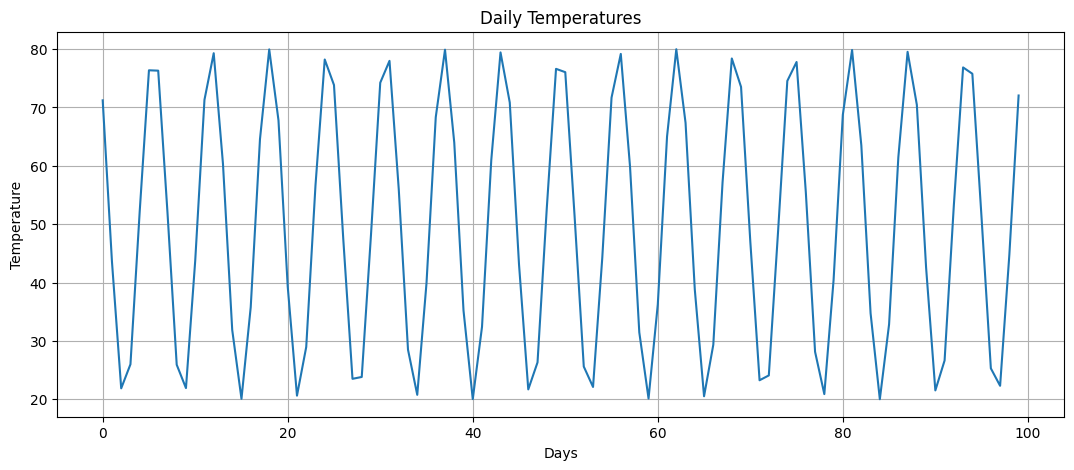

In [6]:
plt.figure(figsize=(13,5))
# Line plot to see temperature trends
sns.lineplot(data=df['Temperature'])
plt.grid()
plt.title('Daily Temperatures')
plt.xlabel('Days')
plt.ylabel('Temperature')

plt.show()

In [7]:
# Basic statistics
print(df.describe())

       Temperature
count   100.000000
mean     49.835852
std      21.255238
min      20.021208
25%      28.415242
50%      49.867323
75%      71.236622
max      79.967635


       Temperature  Rolling_Mean  Rolling_Std
count   100.000000     94.000000    94.000000
mean     49.835852     49.991403    22.769063
std      21.255238      2.225724     0.823072
min      20.021208     46.867637    21.599983
25%      28.415242     47.785249    21.924795
50%      49.867323     49.868251    22.807872
75%      71.236622     52.234311    23.569715
max      79.967635     53.133529    23.915182


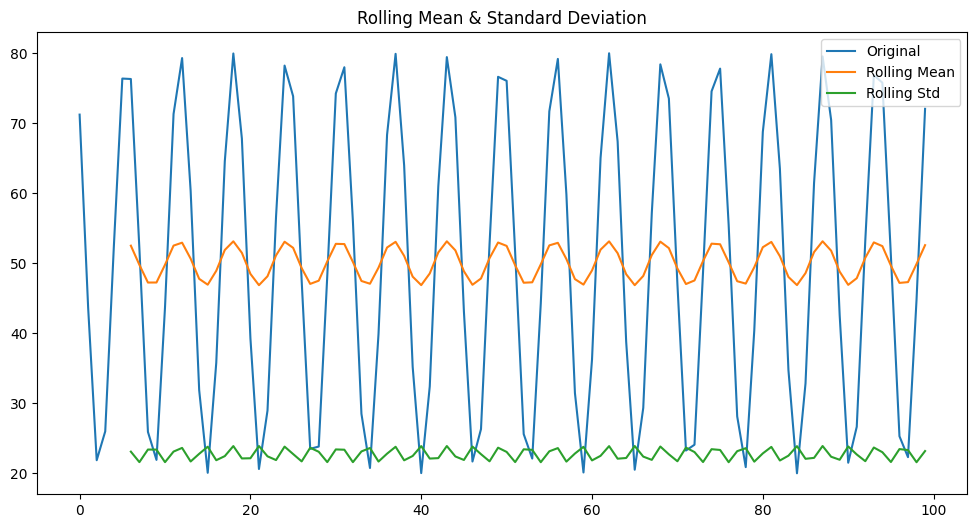

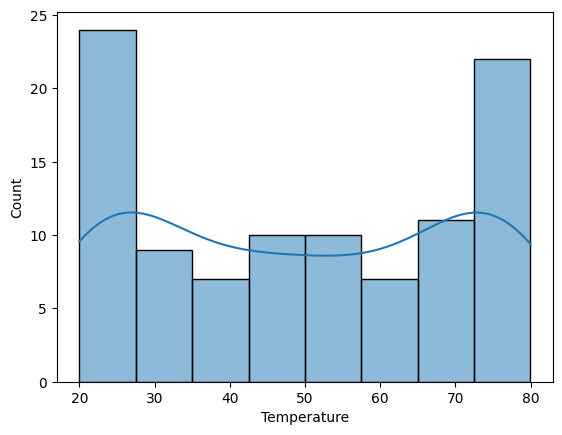

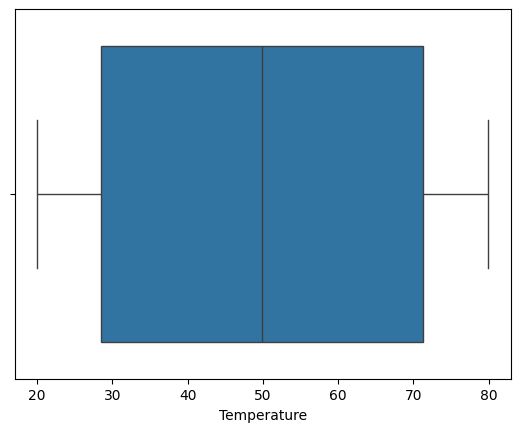

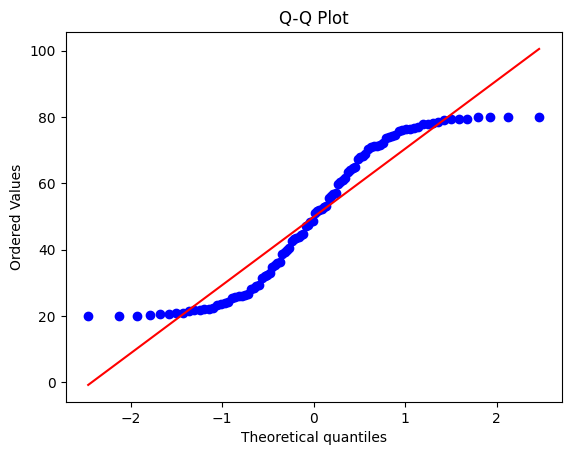

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Basic Descriptive Statistics
print(df.describe())

# Rolling Mean and Standard Deviation
rolling_window = 7  # 7 days for a weekly rolling measure
df['Rolling_Mean'] = df['Temperature'].rolling(window=rolling_window).mean()
df['Rolling_Std'] = df['Temperature'].rolling(window=rolling_window).std()

# Plotting Rolling Statistics
plt.figure(figsize=(12, 6))
plt.plot(df['Temperature'], label='Original')
plt.plot(df['Rolling_Mean'], label='Rolling Mean')
plt.plot(df['Rolling_Std'], label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

# Histogram and Density Plot
sns.histplot(df['Temperature'], kde=True)
plt.show()

# Box Plot
sns.boxplot(x=df['Temperature'])
plt.show()

# Q-Q Plot
stats.probplot(df['Temperature'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

## Linear Regression from Scratch

Iteration 0: Cost 1294.6494629008043
Final Mean Squared Error: 447.2914474458727


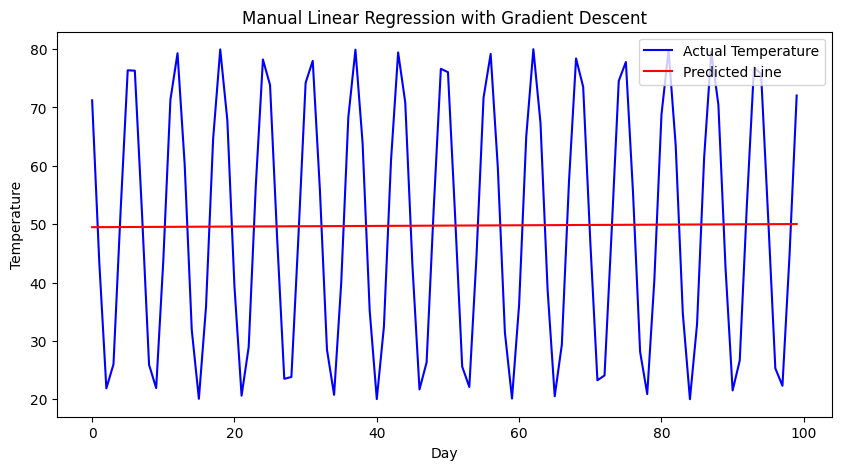

In [9]:
def gradient_mm(m, c, X, Y):
    # Calculate the gradient of the cost function with respect to m
    N = len(X)
    predictions = predict(m, c, X)
    gradient = -2 * sum(x * (y - y_pred) for x, y, y_pred in zip(X, Y, predictions)) / N
    return gradient
    
def gradient_cc(m, c, X, Y):
    # Calculate the gradient of the cost function with respect to c
    N = len(X)
    predictions = predict(m, c, X)
    gradient = -2 * sum(y - y_pred for y, y_pred in zip(Y, predictions)) / N
    return gradient


# Define predict and cost_function if not already defined
def predict(m, c, X):
    return [m * x + c for x in X]

def cost_function(m, c, X, Y):
    predictions = predict(m, c, X)
    return sum((y - y_pred) ** 2 for y, y_pred in zip(Y, predictions)) / len(X)

# Gradient descent updates
def gradient_descent(X, Y, m, c, learning_rate, iterations):
    for _ in range(iterations):
        dm = gradient_mm(m, c, X, Y)
        dc = gradient_cc(m, c, X, Y)
        
        m -= learning_rate * dm
        c -= learning_rate * dc
        
        if _ % 100000 == 0:  # Optionally print the cost every 100 iterations
            current_cost = cost_function(m, c, X, Y)
            print(f"Iteration {_}: Cost {current_cost}")
        
    return m, c

# Initialize parameters and settings
X = list(range(len(df)))
Y = df['Temperature'].tolist()
m_initial = 0
c_initial = 0
learning_rate = 0.0001
iterations = 100000

# Run gradient descent to find optimal m and c
m_optimal, c_optimal = gradient_descent(X, Y, m_initial, c_initial, learning_rate, iterations)

# Compute final MSE
final_mse = cost_function(m_optimal, c_optimal, X, Y)
print("Final Mean Squared Error:", final_mse)

# Plot results
predictions = predict(m_optimal, c_optimal, X)
plt.figure(figsize=(10, 5))
plt.plot(X, Y, color='blue', label='Actual Temperature')
plt.plot(X, predictions, color='red', label='Predicted Line')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Manual Linear Regression with Gradient Descent')
plt.legend()
plt.show()


## Sinusoidal Regression from Scratch

In [6]:
df = pd.read_csv('temperatures.csv', header=None)

X_values = np.linspace(0, 100, len(df))  

Y_values = df[0].values 


Epoch 0, MSE: 0.0
Epoch 1000, MSE: 0.0
Epoch 2000, MSE: 0.0
Epoch 3000, MSE: 0.0
Epoch 4000, MSE: 0.0
Epoch 5000, MSE: 0.0
Epoch 6000, MSE: 0.0
Epoch 7000, MSE: 0.0
Epoch 8000, MSE: 0.0
Epoch 9000, MSE: 0.0
Epoch 10000, MSE: 0.0
Epoch 11000, MSE: 0.0
Epoch 12000, MSE: 0.0
Epoch 13000, MSE: 0.0
Epoch 14000, MSE: 0.0
Epoch 15000, MSE: 0.0
Epoch 16000, MSE: 0.0
Epoch 17000, MSE: 0.0
Epoch 18000, MSE: 0.0
Epoch 19000, MSE: 0.0


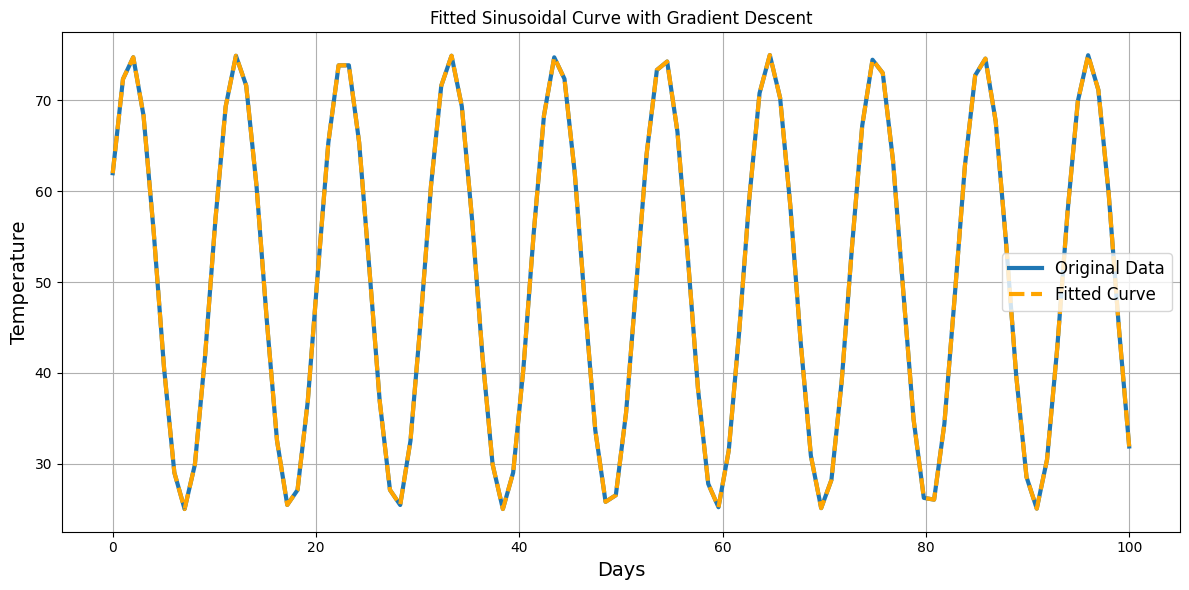

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the sinusoidal model function
def sinusoidal(X, a, b, c, d):
    # Ensure that X is a NumPy array for element-wise operations
    X = np.array(X)
    return a * np.sin(b * X + c) + d

# Step 2: Define the loss function (MSE)
def mse_loss(Y_actual, Y_predicted):
    return np.mean((Y_actual - Y_predicted) ** 2)

# Step 3: Define the gradient descent function with better initialization
def gradient_descent(X, Y, learning_rate=0.0001, epochs=10000):
    # initialize parameters closer to the expected values
    a, b, c, d = 25, 0.6, 0.5, 50  
    
    X = np.array(X)
    Y = np.array(Y)
    
    n = len(Y) 
    for epoch in range(epochs):
        # predict Y with current parameters
        Y_pred = sinusoidal(X, a, b, c, d)
        
        # compute the gradients for each parameter
        grad_a = (-2/n) * np.sum((Y - Y_pred) * np.sin(b * X + c))
        grad_b = (-2/n) * np.sum((Y - Y_pred) * a * X * np.cos(b * X + c))
        grad_c = (-2/n) * np.sum((Y - Y_pred) * a * np.cos(b * X + c))
        grad_d = (-2/n) * np.sum((Y - Y_pred))
        
        # update parameters with the gradients
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d

        if epoch % 1000 == 0:
            loss = mse_loss(Y, Y_pred)
            print(f"Epoch {epoch}, MSE: {loss}")
    
    return a, b, c, d

# Step 4: Generate synthetic data (or use your actual data)
X = np.linspace(0, 100, 100)  
Y = 25 * np.sin(0.6 * X + 0.5) + 50  # simulated Y values (Temperatures)

X = np.array(X)

# Step 5: Apply gradient descent to find the best parameters
learning_rate = 0.0001 
epochs = 20000 
a, b, c, d = gradient_descent(X, Y, learning_rate, epochs)

# Step 6: Generate the fitted values using the learned parameters
Y_fitted = sinusoidal(X, a, b, c, d)

# Step 7: Plot the original data and the fitted curve
plt.figure(figsize=(12, 6))
plt.plot(X, Y, label='Original Data', linewidth=3)
plt.plot(X, Y_fitted, label='Fitted Curve', linestyle='--', color='orange', linewidth=3)
plt.grid(True)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.title(f'Fitted Sinusoidal Curve with Gradient Descent')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


## Sinusoidal Regression (Regularization) from Scratch

Epoch 0, MSE: 711.5601071553616, a=29.99999762639731, b=1.0040969034693572, c=0.5000839966939408, d=49.99999996033293, alpha_L1=0.0, alpha_L2=0.0
Epoch 10000, MSE: 246.05547266202268, a=29.990279314518663, b=1.0132908278946071, c=0.7853664885858279, d=49.998729742944604, alpha_L1=0.0, alpha_L2=0.0
Epoch 20000, MSE: 177.85555197212085, a=29.98304139176613, b=1.009467405485359, c=1.0462615743003765, d=49.99757039059277, alpha_L1=0.0, alpha_L2=0.0
Epoch 30000, MSE: 124.32564824859071, a=29.97783158067002, b=1.0060557785124133, c=1.2773594086150948, d=49.996553917804555, alpha_L1=0.0, alpha_L2=0.0
Epoch 40000, MSE: 84.55557644495613, a=29.974189963814798, b=1.0031023283072704, c=1.4765090795797522, d=49.99569119443871, alpha_L1=0.0, alpha_L2=0.0
Epoch 50000, MSE: 56.290108436805006, a=29.971704396556753, b=1.0006063039218391, c=1.644363879011227, d=49.99497696579945, alpha_L1=0.0, alpha_L2=0.0
Epoch 60000, MSE: 36.87739157707307, a=29.970039063479522, b=0.9985351359216763, c=1.783444105008

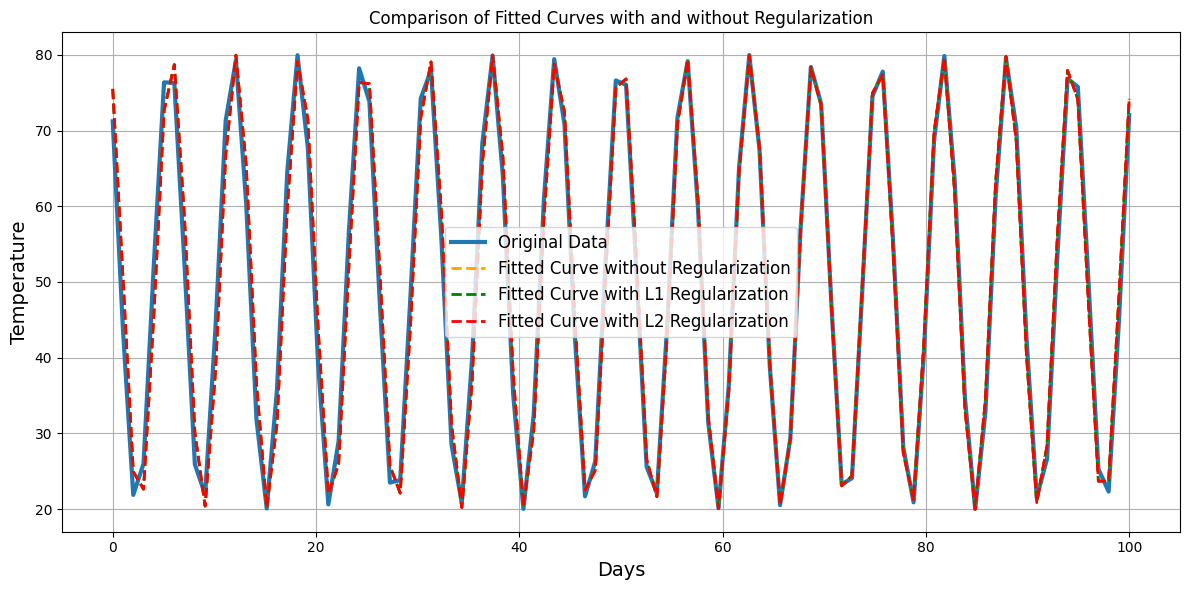

In [10]:
df = pd.read_csv('temperatures.csv', header=None)

X = np.linspace(0, 100, len(df)) 
Y = df[0].values 

# define the sinusoidal model function
def sinusoidal(X, a, b, c, d):
    return a * np.sin(b * X + c) + d

# define the MSE loss function
def mse_loss(Y_actual, Y_predicted):
    return np.mean((Y_actual - Y_predicted) ** 2)

# define the loss function with L1 and L2 regularization
def mse_loss_with_regularization(Y_actual, Y_predicted, a, b, c, d, alpha_L1, alpha_L2):
    mse = np.mean((Y_actual - Y_predicted) ** 2)
    regularization_L1 = alpha_L1 * (np.abs(a) + np.abs(b) + np.abs(c) + np.abs(d))
    regularization_L2 = alpha_L2 * (a**2 + b**2 + c**2 + d**2)
    return mse + regularization_L1 + regularization_L2

# define gradient descent with regularization
def gradient_descent(X, Y, learning_rate=0.000001, epochs=100000, alpha_L1=0.0, alpha_L2=0.0):
    # parameters
    a, b, c, d = 30, 1.0, 0.5, 50
    
    X = np.array(X)
    Y = np.array(Y)
    
    n = len(Y)
    for epoch in range(epochs):
        Y_pred = sinusoidal(X, a, b, c, d)
        
        # compute gradients
        grad_a = (-2/n) * np.sum((Y - Y_pred) * np.sin(b * X + c)) + alpha_L1 * np.sign(a) + 2 * alpha_L2 * a
        grad_b = (-2/n) * np.sum((Y - Y_pred) * a * X * np.cos(b * X + c)) + alpha_L1 * np.sign(b) + 2 * alpha_L2 * b
        grad_c = (-2/n) * np.sum((Y - Y_pred) * a * np.cos(b * X + c)) + alpha_L1 * np.sign(c) + 2 * alpha_L2 * c
        grad_d = (-2/n) * np.sum((Y - Y_pred)) + alpha_L1 * np.sign(d) + 2 * alpha_L2 * d
        
        # update parameters using gradients
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c
        d -= learning_rate * grad_d
        
        if epoch % 10000 == 0:
            loss = mse_loss_with_regularization(Y, Y_pred, a, b, c, d, alpha_L1, alpha_L2)
            print(f"Epoch {epoch}, MSE: {loss}, a={a}, b={b}, c={c}, d={d}, alpha_L1={alpha_L1}, alpha_L2={alpha_L2}")
        if epoch == 4999999:
            loss = mse_loss_with_regularization(Y, Y_pred, a, b, c, d, alpha_L1, alpha_L2)
            print(f"Final Epoch {epoch}, MSE: {loss}, a = {a}, b = {b}, c = {c}, d = {d}, alpha_L1 = {alpha_L1}, alpha_L2 = {alpha_L2}")
    
    return a, b, c, d

# fit the model without regularization
a_no_reg, b_no_reg, c_no_reg, d_no_reg = gradient_descent(X, Y, learning_rate=0.0000001, epochs=100000)

# fit the model with L1 regularization
alpha_L1 = 0.046415888
a_L1, b_L1, c_L1, d_L1 = gradient_descent(X, Y, learning_rate=0.0000001, epochs=100000, alpha_L1=alpha_L1)

# fit the model with L2 regularization
alpha_L2 = 0.01
a_L2, b_L2, c_L2, d_L2 = gradient_descent(X, Y, learning_rate=0.0000001, epochs=100000, alpha_L2=alpha_L2)

# Generate fitted values for each model
Y_fitted_no_reg = sinusoidal(X, a_no_reg, b_no_reg, c_no_reg, d_no_reg)
Y_fitted_L1 = sinusoidal(X, a_L1, b_L1, c_L1, d_L1)
Y_fitted_L2 = sinusoidal(X, a_L2, b_L2, c_L2, d_L2)

# Compute the MSE for each model
mse_no_reg = mse_loss(Y, Y_fitted_no_reg)
mse_L1 = mse_loss_with_regularization(Y, Y_fitted_L1, a_L1, b_L1, c_L1, d_L1, alpha_L1, 0.0)
mse_L2 = mse_loss_with_regularization(Y, Y_fitted_L2, a_L2, b_L2, c_L2, d_L2, 0.0, alpha_L2)

# Display MSEs
print(f"MSE without regularization: {mse_no_reg}")
print(f"MSE with L1 regularization (Lasso): {mse_L1}")
print(f"MSE with L2 regularization (Ridge): {mse_L2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(X, Y, label='Original Data', linewidth=3)
plt.plot(X, Y_fitted_no_reg, label='Fitted Curve without Regularization', linestyle='--', color='orange', linewidth=2)
plt.plot(X, Y_fitted_L1, label='Fitted Curve with L1 Regularization', linestyle='--', color='green', linewidth=2)
plt.plot(X, Y_fitted_L2, label='Fitted Curve with L2 Regularization', linestyle='--', color='red', linewidth=2)
plt.grid(True)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Temperature', fontsize=14) 
plt.title(f'Comparison of Fitted Curves with and without Regularization')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
